# IEOR 4735 – Structured and Hybrid Products
## Name: Sajay Velmurugan 
## UNI: SV2692


## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.integrate as integrate
#from scipy.interpolate import interp1d
from scipy import interpolate
import scipy.stats as st
import yfinance as yahooFinance
import pandas as pd

## Parameters

All the necessary market data and parameters have been defined in a dictionary which can be used through out the program. <br>

Any parameters which needs to be modifed for the pricing routine can be modifed in the pricing_params key in the dictionar

In [2]:
params = {
    'pricing_params' : {
        'K' : 1,
        'K_prime' : 1,
        'delta' : 0.25,
        'T' : 1
    },
    'simulation_params' : {
        'num_paths' : 10000,
        'num_steps' : 10000,
    },
    'nikkei_225' : {
        "options_K" : np.array([20000, *range(20500, 32250, 250)]),
        "options_price" : np.array([7545, 7060, 6815, 6570, 6330, 6090, 5840, 5600, 5465, 5130, 4890, 4650, 
                 4420, 4190, 3960, 3730, 3505, 3285, 3065, 2850, 2640, 2435, 2235, 2040,
                 1850, 1675, 1500, 1340, 1185, 1045, 890, 770, 655, 560, 475, 395, 330, 270,
                 220, 180, 145, 115, 95, 76, 60, 48, 36, 28]),
        "current_price" : 27000,
        "dividend_yield" : 0.018
        
    },
    'rf_yen' : -0.089/100,
    'JPY_USD' : {
        "sigma_JPY_USD" : 0.131729
    },
    'ZCB' : {
        'market_price' : [1.0,0.999966573000000,0.998930882000000,0.997824062000000,0.996511145000000,0.995199956000000,0.993821602000000,0.992277014000000,0.990734827000000,0.989164324000000,0.987428762000000,0.985704346000000,0.983946708000000,0.982068207000000,0.980193293000000,0.978281187000000,0.976255832000000,0.974234670000000,0.972174514000000,0.970028236000000,0.967886697000000,0.965693800000000,0.963440984000000,0.961193424000000,0.958903753000000,0.956575247000000,0.954252397000000,0.951842433000000,0.949228406000000,0.946482248000000,0.943632525000000,0.940707509000000,0.937735160000000,0.934743101000000,0.931758611000000,0.928808623000000,0.925919731000000,0.923110403000000,0.920338655000000,0.917589739000000,0.914858924000000,0.912141532000000,0.909432941000000,0.906728583000000,0.904023944000000,0.901314567000000,0.898596044000000,0.895864025000000,0.893114214000000,0.890346348000000,0.887569841000000,0.884786140000000,0.881996090000000,0.879200528000000,0.876400278000000,0.873596157000000,0.870788975000000,0.867979528000000,0.865168605000000,0.862356987000000,0.859545442000000,0.856732322000000,0.853915005000000,0.851094371000000,0.848271318000000,0.845446732000000,0.842621487000000,0.839796449000000,0.836972470000000,0.834150393000000,0.831331050000000,0.828515261000000,0.825703790000000,0.822893949000000,0.820084325000000,0.817275636000000,0.814468590000000,0.811663887000000,0.808862219000000,0.806064266000000,0.803270701000000,0.800482187000000,0.797699379000000,0.794922921000000,0.792153338000000,0.789389717000000,0.786631547000000,0.783878633000000,0.781130782000000,0.778387801000000,0.775649505000000,0.772915708000000,0.770186227000000,0.767460882000000,0.764739497000000,0.762021898000000,0.759308200000000,0.756599781000000,0.753896558000000,0.751198194000000,0.748504356000000,0.745814715000000,0.743128950000000,0.740446741000000,0.737767776000000,0.735091745000000,0.732418345000000,0.729747277000000,0.727078670000000,0.724413443000000,0.721751645000000,0.719093279000000,0.716438346000000,0.713786850000000,0.711138792000000,0.708494177000000,0.705853006000000,0.703215284000000,0.700581015000000,0.697950202000000,0.695320544000000,0.692690217000000,0.690059929000000,0.687430378000000,0.684802253000000,0.682176235000000,0.679552992000000,0.676933185000000,0.674317462000000,0.671706465000000,0.669100824000000,0.666501159000000,0.663908082000000,0.661322194000000,0.658744089000000,0.656174348000000,0.653613545000000,0.651062245000000,0.648521002000000,0.645990363000000,0.643470865000000,0.640963036000000,0.638467395000000,0.635983411000000,0.633503959000000,0.631028021000000,0.628556105000000,0.626088714000000,0.623626343000000,0.621169478000000,0.618718599000000,0.616274178000000,0.613836679000000,0.611406558000000,0.608984265000000,0.606570242000000,0.604164924000000,0.601768738000000,0.599382105000000,0.597005438000000,0.594639144000000,0.592283621000000,0.589939262000000,0.587606453000000,0.585285574000000,0.582976996000000,0.580681085000000,0.578398202000000,0.576128698000000,0.573872922000000,0.571631214000000,0.569403908000000,0.567191334000000,0.564993814000000,0.562811666000000,0.560645202000000,0.558494727000000,0.556360543000000,0.554242913000000,0.552138115000000,0.550043470000000,0.547959012000000,0.545884776000000,0.543820795000000,0.541767101000000,0.539723726000000,0.537690699000000,0.535668051000000,0.533655809000000,0.531654001000000,0.529662652000000,0.527681790000000,0.525711438000000,0.523751620000000,0.521802360000000,0.519863678000000,0.517935598000000,0.516018137000000,0.514111318000000,0.512215157000000,0.510329674000000,0.508454885000000,0.506590807000000,0.504737456000000,0.502894847000000,0.501062994000000,0.499241910000000,0.497431609000000,0.495632103000000,0.493843403000000,0.492065521000000,0.490298466000000,0.488542249000000,0.486796879000000,0.485062364000000,0.483338711000000,0.481625929000000,0.479924024000000,0.478233003000000,0.476552870000000,0.474883632000000,0.473225293000000,0.471577858000000,0.469941330000000,0.468315712000000,0.466701007000000,0.465097218000000,0.463504347000000,0.461922395000000,0.460351364000000,0.458791253000000,0.457242065000000,0.455703798000000,0.454176452000000,0.452660027000000,0.451154522000000,0.449659935000000,0.448176257000000,0.446703083000000,0.445240105000000,0.443787209000000,0.442344286000000,0.440911226000000,0.439487920000000,0.438074261000000,0.436670143000000,0.435275460000000,0.433890109000000,0.432513986000000,0.431146989000000,0.429789017000000,0.428439971000000,0.427099751000000,0.425768260000000,0.424445399000000,0.423131074000000,0.421825189000000,0.420527650000000,0.419238363000000,0.417957237000000,0.416684180000000,0.415419101000000,0.414161910000000,0.412912520000000,0.411670842000000,0.410436789000000,0.409210275000000,0.407991213000000,0.406779521000000,0.405575114000000,0.404377909000000,0.403187824000000,0.402004777000000,0.400828688000000,0.399659478000000,0.398497066000000,0.397341375000000,0.396192326000000,0.395049844000000,0.393913852000000,0.392784274000000,0.391661036000000,0.390544064000000,0.389433283000000,0.388328623000000,0.387230010000000,0.386137373000000,0.385050641000000,0.383969745000000,0.382894615000000,0.381825182000000,0.380761378000000,0.379703135000000,0.378650387000000,0.377603067000000,0.376561110000000,0.375524516000000,0.374495509000000,0.373475055000000,0.372462955000000,0.371459016000000,0.370463043000000,0.369474847000000,0.368494238000000,0.367521029000000,0.366555034000000,0.365596072000000,0.364643959000000,0.363698516000000,0.362759566000000,0.361826932000000,0.360900441000000,0.359979918000000,0.359065194000000,0.358156099000000,0.357252465000000,0.356354126000000,0.355460918000000,0.354572678000000,0.353689243000000,0.352810455000000,0.351936156000000,0.351066187000000,0.350200393000000,0.349338622000000,0.348480719000000,0.347626535000000,0.346775919000000,0.345928722000000,0.345084799000000,0.344244003000000,0.343406190000000,0.342571217000000,0.341738943000000,0.340909228000000,0.340081932000000,0.339256917000000,0.338434048000000,0.337613190000000,0.336794207000000,0.335976969000000,0.335161343000000,0.334347200000000,0.333534411000000,0.332722847000000,0.331912384000000,0.331102895000000,0.330294257000000,0.329486347000000,0.328679044000000,0.327872227000000,0.327065778000000,0.326259578000000,0.325453511000000,0.324647462000000,0.323841447000000,0.323037558000000,0.322236538000000,0.321438361000000,0.320642997000000,0.319850421000000,0.319060604000000,0.318273519000000,0.317489140000000,0.316707441000000,0.315928394000000,0.315151974000000,0.314378155000000,0.313606911000000,0.312838216000000,0.312072045000000,0.311308373000000,0.310547175000000,0.309788426000000,0.309032102000000,0.308278178000000,0.307526629000000,0.306777432000000,0.306030564000000,0.305285999000000,0.304543716000000,0.303803690000000,0.303065898000000,0.302330318000000,0.301596926000000,0.300865701000000,0.300136619000000,0.299409659000000,0.298684798000000,0.297962014000000,0.297241286000000,0.296522593000000,0.295805912000000,0.295091222000000,0.294378503000000,0.293667734000000,0.292958894000000,0.292251962000000,0.291546917000000,0.290843741000000,0.290142412000000,0.289442910000000,0.288745217000000,0.288049311000000,0.287355175000000,0.286662788000000,0.285972131000000,0.285283185000000,0.284595932000000,0.283910353000000,0.283226429000000,0.282544142000000,0.281863473000000,0.281184405000000,0.280506920000000,0.279830999000000,0.279156625000000,0.278483781000000,0.277812449000000,0.277142612000000,0.276474253000000,0.275807354000000,0.275141900000000,0.274477873000000,0.273815257000000,0.273154036000000,0.272494193000000,0.271835712000000,0.271178577000000,0.270522772000000,0.269868283000000,0.269215092000000,0.268563184000000,0.267912545000000,0.267263159000000,0.266615011000000,0.265968086000000,0.265322370000000,0.264677847000000,0.264034503000000,0.263392324000000,0.262751295000000,0.262111403000000,0.261472633000000,0.260834972000000,0.260198405000000,0.259562919000000,0.258928501000000,0.258295136000000,0.257662813000000,0.257031517000000,0.256401236000000,0.255771957000000,0.255143667000000,0.254516353000000,0.253890002000000,0.253264603000000,0.252640144000000,0.252016611000000,0.251393992000000,0.250772277000000,0.250151453000000,0.249531508000000,0.248912431000000,0.248294210000000,0.247676834000000,0.247060291000000,0.246444571000000,0.245829663000000,0.245215555000000,0.244602237000000,0.243989698000000,0.243377928000000],
        'market_time' : [0.0,0.00273972600000000,0.0876712330000000,0.172602740000000,0.257534247000000,0.342465753000000,0.427397260000000,0.512328767000000,0.597260274000000,0.682191781000000,0.767123288000000,0.852054795000000,0.936986301000000,1.02191780800000,1.10684931500000,1.19178082200000,1.27671232900000,1.36164383600000,1.44657534200000,1.53150684900000,1.61643835600000,1.70136986300000,1.78630137000000,1.87123287700000,1.95616438400000,2.04109589000000,2.12602739700000,2.21095890400000,2.29589041100000,2.38082191800000,2.46575342500000,2.55068493200000,2.63561643800000,2.72054794500000,2.80547945200000,2.89041095900000,2.97534246600000,3.06027397300000,3.14520547900000,3.23013698600000,3.31506849300000,3.40000000000000,3.48493150700000,3.56986301400000,3.65479452100000,3.73972602700000,3.82465753400000,3.90958904100000,3.99452054800000,4.07945205500000,4.16438356200000,4.24931506800000,4.33424657500000,4.41917808200000,4.50410958900000,4.58904109600000,4.67397260300000,4.75890411000000,4.84383561600000,4.92876712300000,5.01369863000000,5.09863013700000,5.18356164400000,5.26849315100000,5.35342465800000,5.43835616400000,5.52328767100000,5.60821917800000,5.69315068500000,5.77808219200000,5.86301369900000,5.94794520500000,6.03287671200000,6.11780821900000,6.20273972600000,6.28767123300000,6.37260274000000,6.45753424700000,6.54246575300000,6.62739726000000,6.71232876700000,6.79726027400000,6.88219178100000,6.96712328800000,7.05205479500000,7.13698630100000,7.22191780800000,7.30684931500000,7.39178082200000,7.47671232900000,7.56164383600000,7.64657534200000,7.73150684900000,7.81643835600000,7.90136986300000,7.98630137000000,8.07123287700000,8.15616438400000,8.24109589000000,8.32602739700000,8.41095890400000,8.49589041100000,8.58082191800000,8.66575342500000,8.75068493200000,8.83561643800000,8.92054794500000,9.00547945200000,9.09041095900000,9.17534246600000,9.26027397300000,9.34520547900000,9.43013698600000,9.51506849300000,9.60000000000000,9.68493150700000,9.76986301400000,9.85479452100000,9.93972602700000,10.0246575300000,10.1095890400000,10.1945205500000,10.2794520500000,10.3643835600000,10.4493150700000,10.5342465800000,10.6191780800000,10.7041095900000,10.7890411000000,10.8739726000000,10.9589041100000,11.0438356200000,11.1287671200000,11.2136986300000,11.2986301400000,11.3835616400000,11.4684931500000,11.5534246600000,11.6383561600000,11.7232876700000,11.8082191800000,11.8931506800000,11.9780821900000,12.0630137000000,12.1479452100000,12.2328767100000,12.3178082200000,12.4027397300000,12.4876712300000,12.5726027400000,12.6575342500000,12.7424657500000,12.8273972600000,12.9123287700000,12.9972602700000,13.0821917800000,13.1671232900000,13.2520547900000,13.3369863000000,13.4219178100000,13.5068493200000,13.5917808200000,13.6767123300000,13.7616438400000,13.8465753400000,13.9315068500000,14.0164383600000,14.1013698600000,14.1863013700000,14.2712328800000,14.3561643800000,14.4410958900000,14.5260274000000,14.6109589000000,14.6958904100000,14.7808219200000,14.8657534200000,14.9506849300000,15.0356164400000,15.1205479500000,15.2054794500000,15.2904109600000,15.3753424700000,15.4602739700000,15.5452054800000,15.6301369900000,15.7150684900000,15.8000000000000,15.8849315100000,15.9698630100000,16.0547945200000,16.1397260300000,16.2246575300000,16.3095890400000,16.3945205500000,16.4794520500000,16.5643835600000,16.6493150700000,16.7342465800000,16.8191780800000,16.9041095900000,16.9890411000000,17.0739726000000,17.1589041100000,17.2438356200000,17.3287671200000,17.4136986300000,17.4986301400000,17.5835616400000,17.6684931500000,17.7534246600000,17.8383561600000,17.9232876700000,18.0082191800000,18.0931506800000,18.1780821900000,18.2630137000000,18.3479452100000,18.4328767100000,18.5178082200000,18.6027397300000,18.6876712300000,18.7726027400000,18.8575342500000,18.9424657500000,19.0273972600000,19.1123287700000,19.1972602700000,19.2821917800000,19.3671232900000,19.4520547900000,19.5369863000000,19.6219178100000,19.7068493200000,19.7917808200000,19.8767123300000,19.9616438400000,20.0465753400000,20.1315068500000,20.2164383600000,20.3013698600000,20.3863013700000,20.4712328800000,20.5561643800000,20.6410958900000,20.7260274000000,20.8109589000000,20.8958904100000,20.9808219200000,21.0657534200000,21.1506849300000,21.2356164400000,21.3205479500000,21.4054794500000,21.4904109600000,21.5753424700000,21.6602739700000,21.7452054800000,21.8301369900000,21.9150684900000,22,22.0849315100000,22.1698630100000,22.2547945200000,22.3397260300000,22.4246575300000,22.5095890400000,22.5945205500000,22.6794520500000,22.7643835600000,22.8493150700000,22.9342465800000,23.0191780800000,23.1041095900000,23.1890411000000,23.2739726000000,23.3589041100000,23.4438356200000,23.5287671200000,23.6136986300000,23.6986301400000,23.7835616400000,23.8684931500000,23.9534246600000,24.0383561600000,24.1232876700000,24.2082191800000,24.2931506800000,24.3780821900000,24.4630137000000,24.5479452100000,24.6328767100000,24.7178082200000,24.8027397300000,24.8876712300000,24.9726027400000,25.0575342500000,25.1424657500000,25.2273972600000,25.3123287700000,25.3972602700000,25.4821917800000,25.5671232900000,25.6520547900000,25.7369863000000,25.8219178100000,25.9068493200000,25.9917808200000,26.0767123300000,26.1616438400000,26.2465753400000,26.3315068500000,26.4164383600000,26.5013698600000,26.5863013700000,26.6712328800000,26.7561643800000,26.8410958900000,26.9260274000000,27.0109589000000,27.0958904100000,27.1808219200000,27.2657534200000,27.3506849300000,27.4356164400000,27.5205479500000,27.6054794500000,27.6904109600000,27.7753424700000,27.8602739700000,27.9452054800000,28.0301369900000,28.1150684900000,28.2000000000000,28.2849315100000,28.3698630100000,28.4547945200000,28.5397260300000,28.6246575300000,28.7095890400000,28.7945205500000,28.8794520500000,28.9643835600000,29.0493150700000,29.1342465800000,29.2191780800000,29.3041095900000,29.3890411000000,29.4739726000000,29.5589041100000,29.6438356200000,29.7287671200000,29.8136986300000,29.8986301400000,29.9835616400000,30.0684931500000,30.1534246600000,30.2383561600000,30.3232876700000,30.4082191800000,30.4931506800000,30.5780821900000,30.6630137000000,30.7479452100000,30.8328767100000,30.9178082200000,31.0027397300000,31.0876712300000,31.1726027400000,31.2575342500000,31.3424657500000,31.4273972600000,31.5123287700000,31.5972602700000,31.6821917800000,31.7671232900000,31.8520547900000,31.9369863000000,32.0219178100000,32.1068493200000,32.1917808200000,32.2767123300000,32.3616438400000,32.4465753400000,32.5315068500000,32.6164383600000,32.7013698600000,32.7863013700000,32.8712328800000,32.9561643800000,33.0410958900000,33.1260274000000,33.2109589000000,33.2958904100000,33.3808219200000,33.4657534200000,33.5506849300000,33.6356164400000,33.7205479500000,33.8054794500000,33.8904109600000,33.9753424700000,34.0602739700000,34.1452054800000,34.2301369900000,34.3150684900000,34.4000000000000,34.4849315100000,34.5698630100000,34.6547945200000,34.7397260300000,34.8246575300000,34.9095890400000,34.9945205500000,35.0794520500000,35.1643835600000,35.2493150700000,35.3342465800000,35.4191780800000,35.5041095900000,35.5890411000000,35.6739726000000,35.7589041100000,35.8438356200000,35.9287671200000,36.0136986300000,36.0986301400000,36.1835616400000,36.2684931500000,36.3534246600000,36.4383561600000,36.5232876700000,36.6082191800000,36.6931506800000,36.7780821900000,36.8630137000000,36.9479452100000,37.0328767100000,37.1178082200000,37.2027397300000,37.2876712300000,37.3726027400000,37.4575342500000,37.5424657500000,37.6273972600000,37.7123287700000,37.7972602700000,37.8821917800000,37.9671232900000,38.0520547900000,38.1369863000000,38.2219178100000,38.3068493200000,38.3917808200000,38.4767123300000,38.5616438400000,38.6465753400000,38.7315068500000,38.8164383600000,38.9013698600000,38.9863013700000,39.0712328800000,39.1561643800000,39.2410958900000,39.3260274000000,39.4109589000000,39.4958904100000,39.5808219200000,39.6657534200000,39.7506849300000,39.8356164400000,39.9205479500000,40.0054794500000]
    },
    'spot_rate': {
        # https://data.oecd.org/interest/short-term-interest-rates.htm Jan 2010 - Oct 2022
        'historical' : [0.2,0.19,0.23,0.3,0.45,0.52,0.41,0.32,0.28,0.27,0.27,0.3,0.29,0.28,0.28,0.23,0.21,0.22,0.24,0.29,0.33,0.37,0.41,0.49,0.4,0.3,0.29,0.29,0.29,0.32,0.3,0.26,0.24,0.23,0.23,0.24,0.23,0.22,0.21,0.2,0.2,0.19,0.14,0.12,0.11,0.12,0.12,0.14,0.12,0.13,0.12,0.12,0.11,0.11,0.13,0.13,0.12,0.12,0.13,0.15,0.16,0.15,0.14,0.13,0.15,0.18,0.19,0.26,0.27,0.25,0.3,0.54,0.57,0.54,0.55,0.55,0.57,0.55,0.62,0.73,0.75,0.72,0.71,0.87,0.9,0.87,0.98,1.03,1.05,1.16,1.22,1.25,1.25,1.26,1.32,1.54,1.63,1.78,2.08,2.2,2.16,2.19,2.17,2.19,2.24,2.37,2.56,2.69,2.59,2.49,2.48,2.47,2.44,2.3,2.22,2.06,2.03,1.88,1.77,1.76,1.65,1.59,1.35, 1.35, 0.17,0.2,0.18,0.15,0.13,0.12,0.16,0.17,0.14,0.11,0.1,0.11,0.1,0.09,0.1,0.1,0.1,0.11,0.14,0.17,0.22,0.38,0.73,0.91,1.33,1.87,2.5,2.76,3.21,3.85]
    },
    
    'Hull_White': {
        # TO verify
        'lambd' : 0.03
    }
}

### Market Data of Nikkei - 225 Options price

Text(0, 0.5, 'Options Price)')

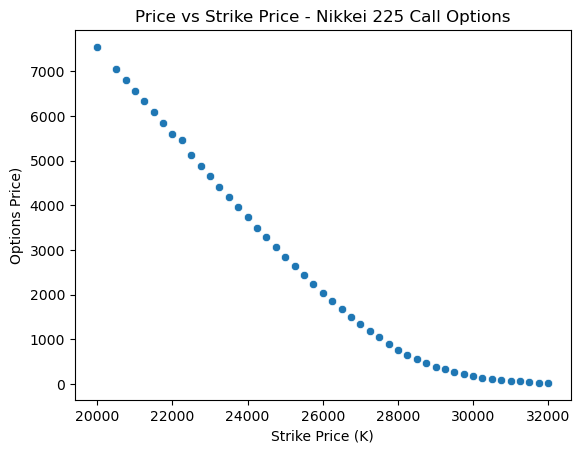

In [3]:
# March 2023 expiry  12/08 prices

K = np.array([20000, *range(20500, 32250, 250)])
price = np.array([7545, 7060, 6815, 6570, 6330, 6090, 5840, 5600, 5465, 5130, 4890, 4650, 
                 4420, 4190, 3960, 3730, 3505, 3285, 3065, 2850, 2640, 2435, 2235, 2040,
                 1850, 1675, 1500, 1340, 1185, 1045, 890, 770, 655, 560, 475, 395, 330, 270,
                 220, 180, 145, 115, 95, 76, 60, 48, 36, 28])

sns.scatterplot(x = K, y = price)
plt.title('Price vs Strike Price - Nikkei 225 Call Options')
plt.xlabel('Strike Price (K)')
plt.ylabel('Options Price)')


### Market Data of ZCB price

Text(0, 0.5, 'ZCB Prices')

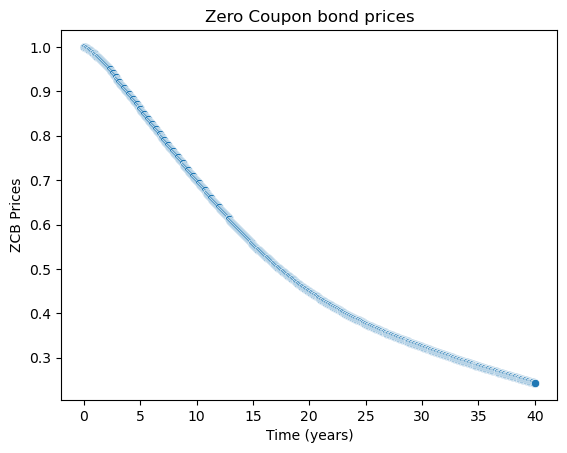

In [4]:

sns.scatterplot(x = params['ZCB']['market_time'], y = params['ZCB']['market_price'])
plt.title('Zero Coupon bond prices')
plt.xlabel('Time (years)')
plt.ylabel('ZCB Prices')



### Calculation of Implied Volatility

Newton's raphson method is used to minimise the difference between the options price calculated using Black scholes model and the options price obtained from the market

In [5]:
def ImpliedVolatility(CP,S_0,K,sigma,tau,r, V_market):
    
    
    error    = 1e10; # initial error

    optPrice = lambda sigma: BS_Call_Option_Price(CP,S_0,K,sigma,tau,r)
    vega= lambda sigma: dV_dsigma(S_0,K,sigma,tau,r)
    

    n = 1.0 
    while error>10e-10:
        g         = optPrice(sigma) - V_market
        g_prim    = vega(sigma)
        sigma_new = sigma - g / g_prim
    
        #error=abs(sigma_new-sigma)
        error=abs(g)
        sigma=sigma_new;
        
#         print('iteration {0} with error = {1}'.format(n,error))
        
        n= n+1
    return sigma

def dV_dsigma(S_0,K,sigma,tau,r):
    #parameters and value of Vega
    d2   = (np.log(S_0 / float(K)) + (r - 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))
    value = K * np.exp(-r * tau) * st.norm.pdf(d2) * np.sqrt(tau)
    return value

def BS_Call_Option_Price(CP,S_0,K,sigma,tau,r):

    d1    = (np.log(S_0 / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))
    d2    = d1 - sigma * np.sqrt(tau)
    
    
    if str(CP).lower()=="c" or str(CP).lower()=="1":
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf(d2) * K * np.exp(-r * tau)
    elif str(CP).lower()=="p" or str(CP).lower()=="-1":
        value = st.norm.cdf(-d2) * K * np.exp(-r * tau) - st.norm.cdf(-d1)*S_0
    return value

Given the mean and sigma, Geometric brownian motion simulation would be generated. Vectrosised form has been implemented taking into account any number of paths and steps

In [6]:
def geometric_brownian_motion(mu, sigma, T, S_0, num_paths, num_steps, W):
    """
    Fix the initial part
    """
    
    
    X = np.zeros(shape = [num_paths, num_steps + 1])
    S = np.zeros(shape = [num_paths, num_steps + 1])

    time = np.linspace(0, T, num_steps + 1)

    S = S_0 * np.exp((mu - 0.5 * sigma **2) * time + sigma*W)
    return S
    
    

## Simulation of Quantoed Nikkei - 225

Function to calculate the historical correlation between Nikkei - 225 and Fx rate. The market prices have been obtained from Yahoo finance 

In [7]:
def correlation_S_Fx():

    
    jpy_usd_prices = yahooFinance.Ticker("JPYUSD=X")
    jpy_usd_prices_6month = jpy_usd_prices.history(period="6mo").reset_index()
    jpy_usd_prices_6month['Date'] = pd.to_datetime(jpy_usd_prices_6month['Date'],format="%Y-%m-%d")
    jpy_usd_prices_6month = jpy_usd_prices_6month.set_index(pd.DatetimeIndex(jpy_usd_prices_6month["Date"]).date).drop('Date', axis = 1)
    jpy_usd_prices_6month = jpy_usd_prices_6month['Close']



    nikkei_225_prices = yahooFinance.Ticker("^N225")
    nikkei_225_prices_6month = nikkei_225_prices.history(period="6mo")

    nikkei_225_prices_6month = nikkei_225_prices_6month.reset_index()
    nikkei_225_prices_6month['Date'] = pd.to_datetime(nikkei_225_prices_6month['Date'],format="%Y-%m-%d")
    nikkei_225_prices_6month = nikkei_225_prices_6month.set_index(pd.DatetimeIndex(nikkei_225_prices_6month["Date"]).date).drop('Date', axis = 1)
    nikkei_225_prices_6month = nikkei_225_prices_6month['Close']
    combined = pd.merge(nikkei_225_prices_6month, jpy_usd_prices_6month, left_index=True, right_index=True, suffixes=('_nikkei_225', '_jpy_usd'))
    rho_S_Fx = combined.corr().iloc[0, 1]
    
    return rho_S_Fx




### Quanto Option Part

Simulation of the below equation is being done here
$$\Big(\frac{S(T)}{S(0)} - k\Big)$$



To determine the implied volatility, we need to use the at the money call options price. So according to the parameter K choosen in the pricing routine, the at the money strike price would differ. So at the money options price corresponding to the nearest strike price calculated based on K has been chosen for calculating the implied volatility

In [8]:
def quanto_option(params, W):
    """
    K - relative strike price
    r_d - Domestic risk free rate (Japan interest free rate in this case)
    
    """
    
    K = params['pricing_params']['K']
    r_d = params['rf_yen']
    rho_S_Fx = correlation_S_Fx()
    sigma_Fx = params['JPY_USD']['sigma_JPY_USD']
    S_0 = params['nikkei_225']['current_price']
    q = params['nikkei_225']['dividend_yield']
    
    T = params['pricing_params']['T']
    num_paths = params['simulation_params']['num_paths']
    num_steps = params['simulation_params']['num_steps']
        
    nikkei_options_price = {}
    for i in range(len(params['nikkei_225']['options_K'])):
        nikkei_options_price[params['nikkei_225']['options_K'][i]] = params['nikkei_225']['options_price'][i]
    
    # Finds the implied volatity - exmplain more
    K_S = min(nikkei_options_price.keys(), key=lambda k: abs(k-K*S_0))
    V_mkt = nikkei_options_price[K_S]

    sigma_S = ImpliedVolatility('c', S_0, K_S, 0.1, T, r_d, V_mkt)
    
    mu = r_d - q - rho_S_Fx*sigma_S*sigma_Fx
    sigma = sigma_S
    asset_price = geometric_brownian_motion(mu, sigma, T, S_0, num_paths, num_steps, W)
    relative_price = asset_price[:, -1]/S_0
    
    quanto_option_part = (relative_price - K)
    
    return quanto_option_part
    

## LIBOR Forwards option part

Simulation of the following part is done here

$$\Big(k' - \frac{L(T, T, T+ \Delta}{L(0, T, T + \Delta}\Big)$$

The entire contract is priced by the following equation:
$$V(0) = E^Q \Bigg[e^{-\int_0^T r(s) ds} \frac{\max\Big[0, \Big(\frac{S(T)}{S(0)} - k\Big).\Big(k' - \frac{L(T, T, T+ \Delta)}{L(0, T, T + \Delta}\Big)\Big]} {1 + \Delta L(T, T, T+ \Delta)}\mid F(0)\Bigg]$$

Of which three parts need the short rate simulation:
1. The floorlet option
2. Discouting the payment at $T+\Delta$ to time T
3. Discounting using money market from T to 0


<br>
Hence we combine these three part together and call them as the floorlet_part in the below function. The three parts combined together will look like

$$e^{-\int_0^T r(s) ds}\frac{\Big(k' - \frac{L(T, T, T+ \Delta)}{L(0, T, T + \Delta}\Big)} {1 + \Delta L(T, T, T+ \Delta)}$$

### Simulation of short rate and calculation of Libor forward rate

#### Short rate simulated using Hull White 

The definitions are given in the project report

In [9]:
def HW_A(lambd,eta,P0T,t,T, theta):
    
    tau = T-t
    zGrid = np.linspace(0.0,tau,250)
    
    B_r = lambda tau: 1.0/lambd * (np.exp(-lambd *tau)-1.0)
    
    temp1 = lambd * integrate.trapz(theta(T-zGrid)*B_r(zGrid),zGrid)
    
    temp2 = eta*eta/(4.0*np.power(lambd,3.0)) * (np.exp(-2.0*lambd*tau)*(4*np.exp(lambd*tau)-1.0) -3.0) + eta*eta*tau/(2.0*lambd*lambd)
    
    return temp1 + temp2

def HW_B(lambd,eta,t,T):
    return 1.0/lambd *(np.exp(-lambd*(T-t))-1.0)


def HW_P_tT(lambd,eta, P0T, t, T, R, theta):
    
    num_paths = params['simulation_params']['num_paths']
    num_steps = params['simulation_params']['num_steps']
    delta = params['pricing_params']['delta']
    dt = (T + delta)/num_steps
    
    if(t == T):
        return np.ones([params['simulation_params']['num_paths']])
    
    
    
    t_index = int(t/dt)
    T_index = int(T/dt)
    R_t = R[:, t_index]
    
    B_r = HW_B(lambd,eta,t,T)
    A_r = HW_A(lambd,eta,P0T,t,T, theta)
    
    P_tT = np.exp(A_r + B_r *R_t)
    
    return P_tT

    

def floorlet_part_HW(params, W):

    ti = params['ZCB']['market_time']
    Pi = params['ZCB']['market_price']
    interpolator =  interpolate.splrep(ti, Pi, s=0.00001)

    P0T = lambda T: np.exp(interpolate.splev(T, interpolator, der=0))

    # time step for differentiatation dt = 0.001
    f0T = lambda T: - (np.log(P0T(T + 0.001)) - np.log(P0T(T - 0.001)))/(2 * 0.001)

    r0 = f0T(0)
    
    K_prime = params['pricing_params']['K_prime']
    # If options price was avaialble, the implied volatility function could have been used to determine eta
    eta = np.std(np.array(params['spot_rate']['historical'])/100)

    lambd = params['Hull_White']['lambd']
    
    T = params['pricing_params']['T']
    delta = params['pricing_params']['delta']
    num_paths = params['simulation_params']['num_paths']
    num_steps = params['simulation_params']['num_steps']
    dt = (T + delta)/num_steps

    theta = lambda t: 1.0/lambd * (f0T(t+dt)-f0T(t-dt))/(2.0*dt) + f0T(t) + eta*eta/(2.0*lambd*lambd)*(1.0-np.exp(-2.0*lambd*t)) 
    

    Z = np.random.normal(0.0,1.0,[num_paths,num_steps])
    R = np.zeros([num_paths, num_steps+1])
    R[:,0] = r0
    time = np.zeros([num_steps+1])

    for i in range(0,num_steps):
        R[:,i+1] = R[:,i] + lambd*(theta(time[i]) - R[:,i]) * dt + eta* (W[:,i+1]-W[:,i])
        time[i+1] = time[i] +dt

    t_index = int(T/dt)
    
    M_t = np.zeros([num_paths,num_steps])
    for i in range(0,num_paths):
        M_t[i,:] = np.exp(np.cumsum(R[i,:-1])*dt)
    
    floorlet_part_ = K_prime - (HW_P_tT(lambd,eta, P0T, T, T, R, theta)/HW_P_tT(lambd,eta, P0T, T, T + delta, R, theta) - 1)/(HW_P_tT(lambd,eta, P0T, 0, T, R, theta)/HW_P_tT(lambd,eta, P0T, 0, T + delta, R, theta) - 1)
    discount_part = HW_P_tT(lambd,eta, P0T, T, T, R, theta)/HW_P_tT(lambd,eta, P0T, T, T + delta, R, theta)
    
    t_index = int(T/dt)
    M_T = M_t[:, t_index]
    
    return floorlet_part_/(discount_part*M_T)
    

#### Short rate simulated using Ho-Lee model

The definitions are given in the project report

In [10]:
def P_tT_HL(params, t, T, P0T, f0T, sigma, R):
    
    num_paths = params['simulation_params']['num_paths']
    num_steps = params['simulation_params']['num_steps']
    delta = params['pricing_params']['delta']
    dt = (T + delta)/num_steps
    if(t == T):
        return np.ones([params['simulation_params']['num_paths']])
    
    t_index = int(t/dt)
    T_index = int(T/dt)
    R_t = R[:, t_index]
    
    P_tT = P0T(T)/P0T(t)*np.exp((T - t) * f0T(t) - sigma*sigma/2*t*((T - t)**2) - (T - t)*R_t)
    
    return P_tT
    

def floorlet_part_HL(params, W):

    ti = params['ZCB']['market_time']
    Pi = params['ZCB']['market_price']
    interpolator =  interpolate.splrep(ti, Pi, s=0.00001)

    P0T = lambda T: np.exp(interpolate.splev(T, interpolator, der=0))

    # time step for differentiatation dt = 0.001
    f0T = lambda T: - (np.log(P0T(T + 0.001)) - np.log(P0T(T - 0.001)))/(2 * 0.001)

    r0 = f0T(0)
    
    K_prime = params['pricing_params']['K_prime']
    sigma = np.std(np.array(params['spot_rate']['historical'])/100)
    
    lambd = params['Hull_White']['lambd']
    
    T = params['pricing_params']['T']
    delta = params['pricing_params']['delta']
    num_paths = params['simulation_params']['num_paths']
    num_steps = params['simulation_params']['num_steps']
    dt = (T + delta)/num_steps
    
    theta = lambda t: (f0T(t+dt)-f0T(t-dt))/(2.0*dt) + sigma**2.0*t
    
    R = np.zeros([num_paths, num_steps+1])
    M_t = np.zeros([num_paths,num_steps+1])
    M_t[:,0]= 1.0
    R[:,0]=r0
    time = np.zeros([num_steps+1])
        
    dt = T / float(num_steps)
    for i in range(0,num_steps):

        R[:,i+1] = R[:,i] + theta(time[i]) * dt + sigma* (W[:,i+1]-W[:,i])
        M_t[:,i+1] = M_t[:,i] * np.exp((R[:,i+1]+R[:,i])*0.5*dt)
        time[i+1] = time[i] +dt


    t_index = int(T/dt)
    
    
    P_TT = P_tT_HL(params, T, T, P0T, f0T, sigma, R)
    P_T_TD = P_tT_HL(params, T, T + delta, P0T, f0T, sigma, R)
    P_0_T = P_tT_HL(params, 0, T, P0T, f0T, sigma, R)
    P_0_TD = P_tT_HL(params, 0, T + delta, P0T, f0T, sigma, R)
    
    floorlet_part_ = K_prime - (P_TT/P_T_TD - 1)/(P_0_T/P_0_TD - 1)
    discount_part = P_TT/P_T_TD
    
    t_index = int(T/dt)
    M_T = M_t[:, t_index]
    
    return floorlet_part_/(discount_part*M_T)
    
    

### Putting it all together

Correlation between the wiener process for simulations of short rate and Nikkei-225 have been found below from the historical prices and have been bumped up to be aggressive since realised correlation is generally lesser than implied correlation

In [11]:
def correlation_S_r():
    historical_r = np.array(params['spot_rate']['historical'])

    nikkei_225_prices = yahooFinance.Ticker("^N225")
    nikkei_225_prices_close = nikkei_225_prices.history(period="6mo", interval = '1mo', start = '2010-01-01', end = '2022-10-02')
    nikkei_225_prices_close = nikkei_225_prices_close['Close'].values

    rho_S_r = np.corrcoef(historical_r, nikkei_225_prices_close)[0, 1]
    return rho_S_r

Trajectory of Nikkei - 225 and short rates

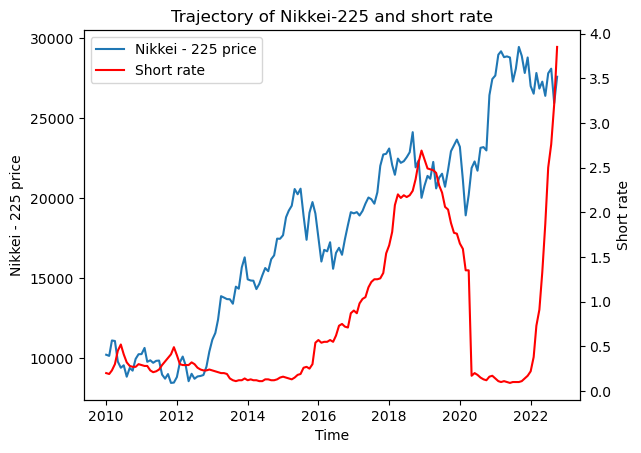

In [12]:
# def correlation_S_r():
historical_r = np.array(params['spot_rate']['historical'])

nikkei_225_prices = yahooFinance.Ticker("^N225")
nikkei_225_prices_close = nikkei_225_prices.history(period="6mo", interval = '1mo', start = '2010-01-01', end = '2022-10-02')
x = nikkei_225_prices_close.index
nikkei_225_prices_close = nikkei_225_prices_close['Close'].values

rho_S_r = np.corrcoef(historical_r, nikkei_225_prices_close)[0, 1]
#     return rho_S_r/

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, nikkei_225_prices_close, label='Nikkei - 225 price')
ax2.plot(x, historical_r, 'r-', label='Short rate')

# lns = ax1 + ax2
# labs = [l.get_label() for l in lns]
# ax2.legend(lns, labs, loc=0)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc=0)


ax1.set_xlabel('Time')
ax1.set_ylabel('Nikkei - 225 price')
ax2.set_ylabel('Short rate')
# plt.legend(loc="upper left")
plt.title('Trajectory of Nikkei-225 and short rate')
plt.show()

In [13]:

def pricing_exotic_option_HW(params):

    T = params['pricing_params']['T']
    delta = params['pricing_params']['delta']
    num_paths = params['simulation_params']['num_paths']
    num_steps = params['simulation_params']['num_steps']
    dt = (T + delta)/num_steps

    rho_S_r = correlation_S_r()
    rho_S_r = rho_S_r*1.1
    
    # dW for the equity part
    W1 = np.zeros(shape = [num_paths, num_steps + 1])
    dW1 = np.random.normal(0, np.power(dt, 0.5), size = [num_paths, num_steps])
    W1[:, 1:] = np.cumsum(dW1, axis = 1)

    # dW for the interest rate part
    dZ = np.random.normal(0, np.power(dt, 0.5), size = [num_paths, num_steps])
    W2 = np.zeros(shape = [num_paths, num_steps + 1])
    dW2 = rho_S_r*dW1 + np.sqrt(1 - (rho_S_r**2))*dZ
    W2[:, 1:] = np.cumsum(dW2, axis = 1)
    
    # Simulating the quanto option part
    quanto_option_part = quanto_option(params, W1)
    # Simulating the libor rate part
    floorlet_part_ = floorlet_part_HW(params, W2)
#     print(np.mean(floorlet_part_))
    price = np.mean(np.maximum(quanto_option_part*floorlet_part_, 0))
    plt.hist(np.maximum(quanto_option_part*floorlet_part_, 0), density=False, bins=10)
    plt.title("Histogram of prices of contract (Hull White Model)");
    print(f'Price of the contract: {price}')
    return price, np.std(np.maximum(quanto_option_part*floorlet_part_, 0))

In [14]:
def pricing_exotic_option_HL(params):

    T = params['pricing_params']['T']
    delta = params['pricing_params']['delta']
    num_paths = params['simulation_params']['num_paths']
    num_steps = params['simulation_params']['num_steps']
    dt = (T + delta)/num_steps

    rho_S_r = correlation_S_r()
    rho_S_r = rho_S_r*1.1

    # dW for the equity part
    W1 = np.zeros(shape = [num_paths, num_steps + 1])
    dW1 = np.random.normal(0, np.power(dt, 0.5), size = [num_paths, num_steps])
    W1[:, 1:] = np.cumsum(dW1, axis = 1)

    # dW for the interest rate part
    dZ = np.random.normal(0, np.power(dt, 0.5), size = [num_paths, num_steps])
    W2 = np.zeros(shape = [num_paths, num_steps + 1])
    dW2 = rho_S_r*dW1 + np.sqrt(1 - (rho_S_r**2))*dZ
    W2[:, 1:] = np.cumsum(dW2, axis = 1)

    # Simulating the quanto option part
    quanto_option_part = quanto_option(params, W1)
    # Simulating the libor rate part
    floorlet_part_ = floorlet_part_HL(params, W2)

    price = np.mean(np.maximum(quanto_option_part*floorlet_part_, 0))
    plt.hist(np.maximum(quanto_option_part*floorlet_part_, 0), density=False, bins=10)
    plt.title("Histogram of prices of contract (Ho Lee Model)");
    print(f'Price of the contract: {price}')
    
    return price, np.std(np.maximum(quanto_option_part*floorlet_part_, 0))

Price of the contract: 0.007451218423250279


(0.007451218423250279, 0.01775405464243452)

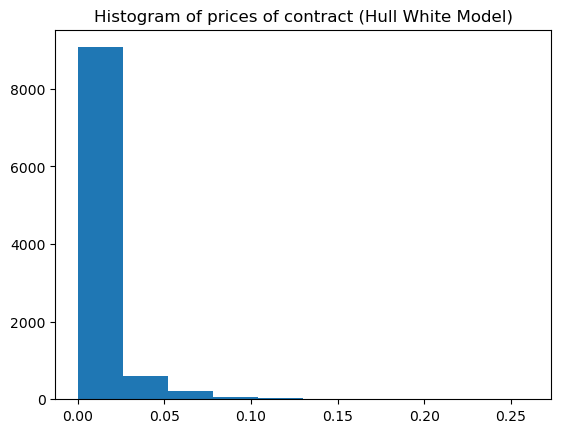

In [15]:
# Pricing of the contract using Hull white model for simulating short rate
pricing_exotic_option_HW(params)

Price of the contract: 0.007701571021378513


(0.007701571021378513, 0.018081566404472112)

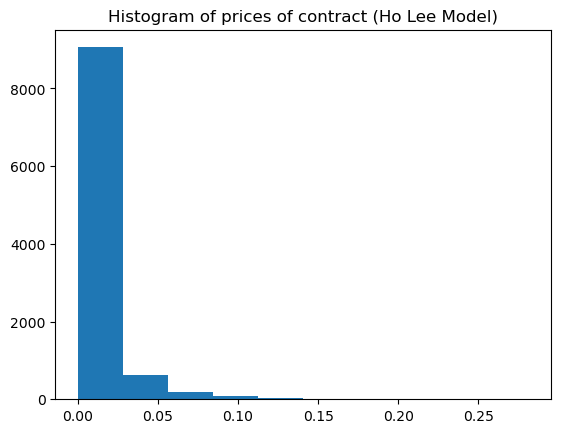

In [16]:
# Pricing of the contract using Ho Lee model for simulating short rate
pricing_exotic_option_HL(params)